# 简介

matplotlib 提供的函数虽然强大，但是参数太多，要想对图表进行深度的定制就需要修改一系列的参数，这一点对新手并不友好。  
另一方面，使用 matplotlib 定制的统计图是静态图表，可能在某些需要交互效果的场景下并不合适。

Seaborn 是建立在 matplotlib 之上的数据可视化工具，它相当于是对 matplotlib 进行了更高级的封装，而且 seaborn 也能跟 pandas 无缝整合，让我们可以用更少的代码构建出更好的统计图表，帮助我们探索和理解数据。Seaborn 包含但不局限于以下描述的功能：
1. 面向数据集的 API，可用于检查多个变量之间的关系。
2. 支持使用分类变量来显示观察结果或汇总统计数据。
3. 能够可视化单变量或双变量分布以及在数据子集之间进行比较的选项
4. 各类因变量线性回归模型的自动估计与作图。
5. 集成调色板和主题，轻松定制统计图表的视觉效果。

下图展示了 seaborn 绘制图表的函数，可以看出，seaborn 的这些函数主要支持我们通过绘制图表来探索数据的关系、分布和分类。  
![函数](file/seaborn函数.png)

## 导入seaborn

In [1]:
import seaborn as sns

# 设置主题
sns.set_theme()

In [2]:
# 在图表上显示中文
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

> 注意：上面的代码必须放在调用 set_theme 函数之后，否则调用 set_theme 函数时又会重新修改 matplotlib 配置参数中的字体设置。

In [3]:
import numpy as np
import pandas as pd

In [4]:
import warnings
warnings.filterwarnings('ignore')

## 数据

加载官方的 Tips 数据集（就餐小费数据），其中 total_bill 表示账单总金额，tip 表示小费的金额，sex 是顾客的性别，smoker 表示顾客是否抽样，day 代表星期几，time 代表是午餐还是晚餐，size 是就餐人数。

In [5]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [7]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
exercise = sns.load_dataset("exercise")
exercise.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [9]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Relational plots（关系图）

## scatterplot（散点图）
参数：  

* x，y：容易理解就是你需要传入的数据，一般为dataframe中的列；
* hue：也是具体的某一可以用做分类的列，作用是分类；
* data：是你的数据集，可要可不要，一般都是dataframe；
* style：绘图的风格（后面单独介绍）；
* size：绘图的大小（后面介绍）；
* palette：调色板（后面单独介绍）；
* markers：绘图的形状（后面介绍）；
* ci：允许的误差范围（空值误差的百分比，0-100之间），可为‘sd’，则采用标准差（默认95）；
* n_boot（int）：计算置信区间要使用的迭代次数；
* alpha：透明度；
* x_jitter，y_jitter：设置点的抖动程度。

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

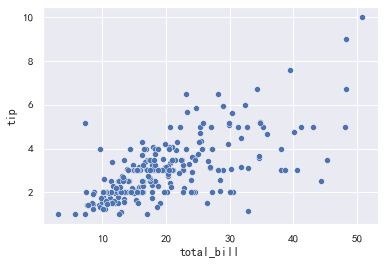

In [10]:
sns.scatterplot(x='total_bill',y='tip',data=tips_df)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

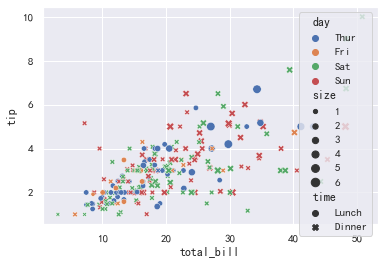

In [11]:
# 按day分类，点的大小按照size字段的大小，点的样式按time字段的类别区分
sns.scatterplot(x='total_bill',y='tip',data=tips_df,hue='day',style='time',size='size')

## lineplot（线图）

参数：

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

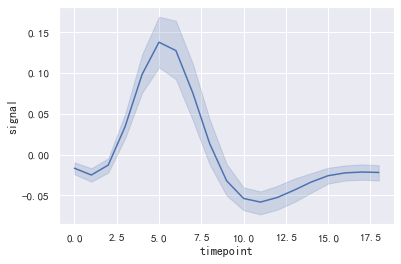

In [12]:
sns.lineplot(x='timepoint',y='signal',data=fmri)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

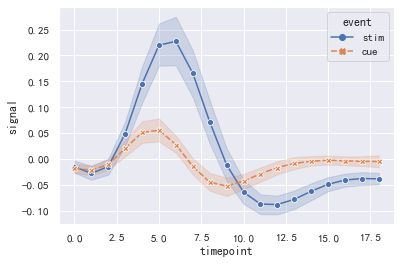

In [13]:
sns.lineplot(x='timepoint',y='signal',data=fmri,hue='event',style='event',markers=True)   

## relplot（关系图）
参数：

relplot（关系图）可以看做是lineplot和scatterplot的归纳，可以通过kind参数来指定画什么图形，重要参数解释如下：

* kind：默认scatter（散点图），也可以选择kind=‘line’（线图）
* sizes：List、dict或tuple，可选，简单点就是图片大小，注意和size区分
* col、row：将决定网格的面数的分类变量，具体看实例

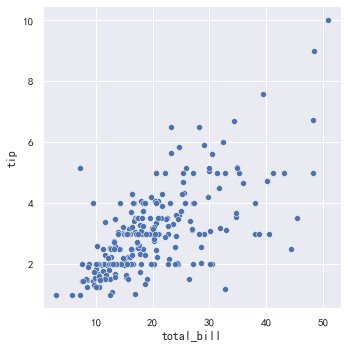

In [14]:
sns.relplot(x='total_bill',y='tip',data=tips_df)
# 两者效果一模一样
# sns.scatterplot(x='total_bill',y='tip',data=tips_df)

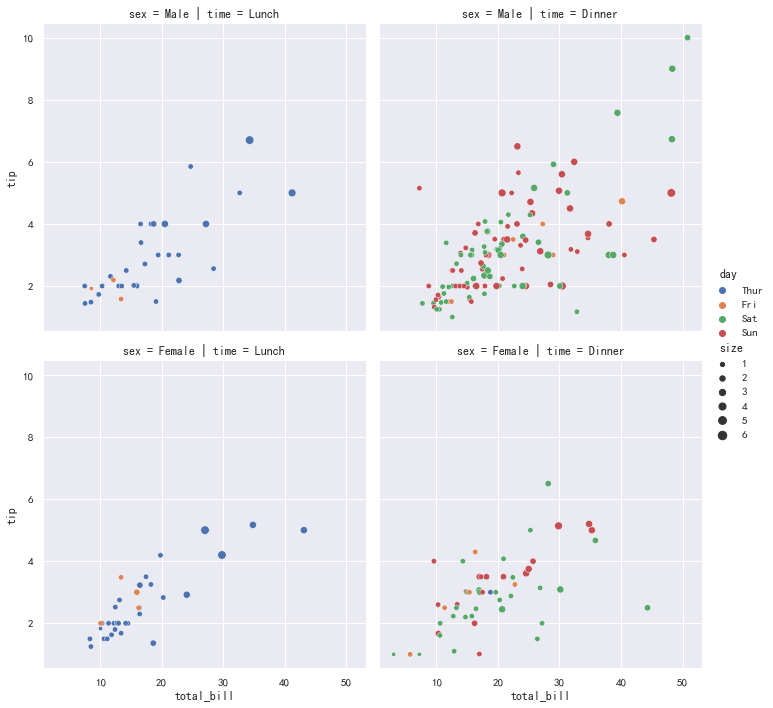

In [15]:
# sns.scatterplot(x='total_bill',y='tip',data=tips_df,hue='day',style='time',size='size')
sns.relplot(x='total_bill',y='tip',data=tips_df,hue='day',size='size',
           col='time',row='sex')

# Categorical plots（分类图）

## Categorical scatterplots（分类散点图）

### stripplot（分布散点图）
stripplot（分布散点图）的意思就是按照不同类别对样本数据进行分布散点图绘制。stripplot（分布散点图）一般并不单独绘制，它常常与boxplot和violinplot联合起来绘制，作为这两种图的补充。  

参数：  

* x，y，data：输入数据可以多种格式传递，在大多数情况下，使用Numpy或Python对象是可能的，但是更可取的是pandas对象，因为相关的名称将用于对轴进行注释。此外，还可以对分组变量使用分类类型来控制情节元素的顺序
* order：用order参数进行筛选分类类别，例如：order=[‘sun’,‘sat’]
* jitter：抖动项，表示抖动程度，可以使float，或者True
* dodge：重叠区域是否分开，当使用hue时，将其设置为True，将沿着分类轴将不同色调级别的条带分开
* orient：“v” | “h”，vertical（垂直） 和 horizontal（水平）的意思

<AxesSubplot:xlabel='day', ylabel='total_bill'>

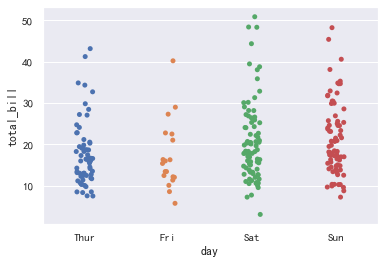

In [16]:
sns.stripplot(x='day',y='total_bill',data=tips_df)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

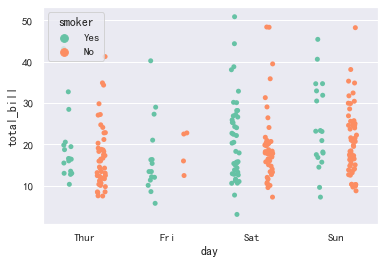

In [17]:
sns.stripplot(x='day',y='total_bill',data=tips_df,
             hue='smoker',dodge=True,jitter=True,palette='Set2')

### swarmplot（分布密度散点图）
类似于stripplot()，但是对点进行了调整(只沿着分类轴)，这样它们就不会重叠。这更好地表示了值的分布，但它不能很好地扩展到大量的观测。  

参数：

<AxesSubplot:xlabel='day', ylabel='total_bill'>

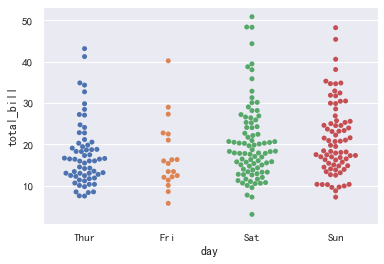

In [18]:
sns.swarmplot(x='day',y='total_bill',data=tips_df)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

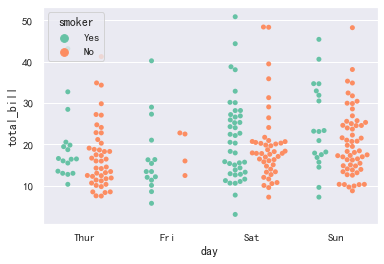

In [19]:
sns.swarmplot(x='day',y='total_bill',data=tips_df,hue='smoker',palette='Set2',dodge=True)

## Categorical distribution plots（分类分布图）

### boxplot（箱线图）
参数：

* saturation：饱和度，可设置为1；
* width：float，控制箱型图的宽度大小；
* fliersize：float，用于指示离群值观察的标记大小；
* whis：可理解为异常值的上限IQR比例；

<AxesSubplot:ylabel='total_bill'>

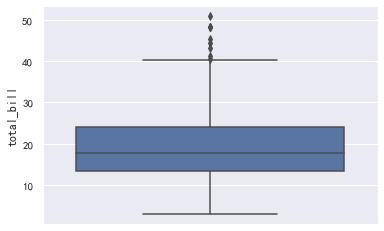

In [20]:
sns.boxplot(data=tips_df,y='total_bill')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

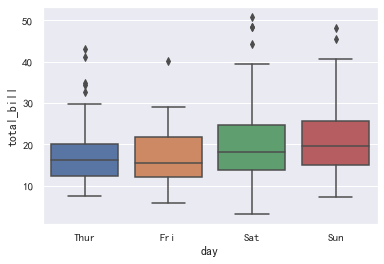

In [21]:
sns.boxplot(data=tips_df,x='day',y='total_bill')

### violinplot（小提琴图）
相较于箱线图，小提琴图没有标注异常点而是显示了数据的整个范围。小提琴绘图以基础分布的核密度估计为特征，通过小提琴图可以知道哪些位置的密度较高,很好的展示了数据的分布（密度轨迹）。  

在图中，白点是中位数，黑色盒型的范围是下四分位点到上四分位点，细黑线表示须。外部形状即为核密度估计。但是估计过程受样本大小的影响，相对较小的样本的小提琴图看起来可能会显得非常平滑。  

参数：

* bw：‘scott’, ‘silverman’, float，控制拟合程度。在计算内核带宽时，可以引用规则的名称（‘scott’, ‘silverman’）或者使用比例（float）。实际内核大小将通过将比例乘以每个bin内数据的标准差来确定
* cut：空值外壳的延伸超过极值点的密度，float
* scale：“area”, “count”, “width”，用来缩放每把小提琴的宽度的方法
* scale_hue：当使用hue分类后，设置为True时，此参数确定是否在主分组变量进行缩放
* gridsize：设置小提琴图的平滑度，越高越平滑
* inner：“box”, “quartile”, “point”, “stick”, None，小提琴内部数据点的表示。分别表示：箱子，四分位，点，数据线和不表示；
* split：是否拆分，当设置为True时，绘制经hue分类的每个级别画出一半的小提琴

<AxesSubplot:xlabel='day', ylabel='total_bill'>

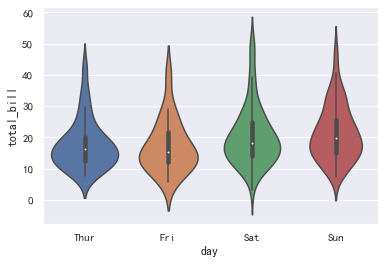

In [22]:
sns.violinplot(data=tips_df,x='day',y='total_bill')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

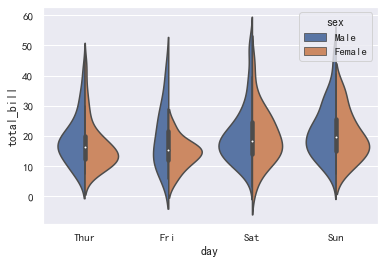

In [23]:
sns.violinplot(data=tips_df,x='day',y='total_bill',hue='sex',split=True)

### violinplot+stripplot（小提琴图+分布散点图）

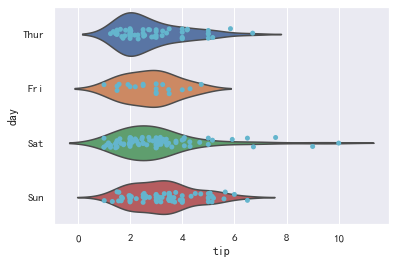

In [24]:
ax = sns.violinplot(data=tips_df,x='tip',y='day',inner=None,whis=np.inf)
ax = sns.stripplot(data=tips_df,x='tip',y='day',jitter=True,color='c')

### violinplot+swarmplot（小提琴图+分布密度散点图）

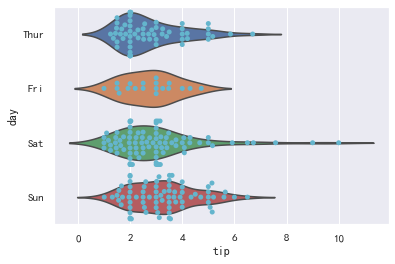

In [25]:
ax = sns.violinplot(data=tips_df,x='tip',y='day',inner=None,whis=np.inf)
ax = sns.swarmplot(data=tips_df,x='tip',y='day',color='c')

### boxplot+stripplot（箱线图+分布散点图）

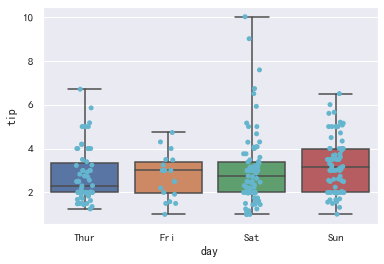

In [26]:
ax = sns.boxplot(data=tips_df,x='day',y='tip',whis=np.inf)
ax = sns.stripplot(data=tips_df,x='day',y='tip',color='c')

### boxplot+swarmplot（箱线图+分布密度散点图）

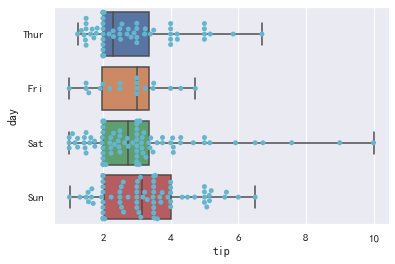

In [27]:
ax = sns.boxplot(data=tips_df,x='tip',y='day',whis=np.inf)
ax = sns.swarmplot(data=tips_df,x='tip',y='day',color='c')

## Categorical estimate plots（分类估计图）

### barplot（条形图）
条形图表示数值变量与每个矩形高度的中心趋势的估计值，用矩形条表示点估计和置信区间，并使用误差线提供关于该估计值附近的不确定性的一些指示。具体用法如下：

* estimator：用于估计每个分类箱内的统计函数，默认为mean，也可以设置 np.median、np.std、np.var等等
* order：选择和空值顺序，例如：order=[‘Sat’,‘Sun’]
* ci：允许的误差的范围（控制误差棒的百分比，在0-100之间）,若填写"sd",则用标准误差(默认为95)，也可设置ci=None
* capsize：设置误差棒帽条（上下两根横线）的宽度，float
* saturation：饱和度
* errcolor：表示置信区间的线条的颜色
* errwidth：float，设置误差条线(和帽)的厚度

<AxesSubplot:xlabel='day', ylabel='total_bill'>

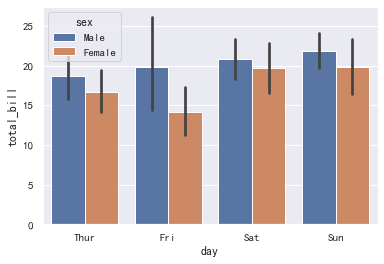

In [28]:
sns.barplot(data=tips_df,x='day',y='total_bill',hue='sex')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

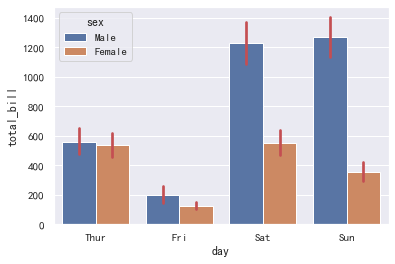

In [29]:
sns.barplot(data=tips_df,x='day',y='total_bill',hue='sex',estimator=np.sum,errcolor='r')

### countplot（计数图）
对输入的数据分类，条形图显示各个分类的数量。具体参数如下：

<AxesSubplot:xlabel='class', ylabel='count'>

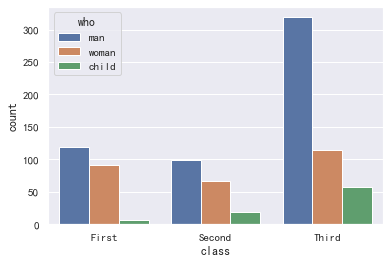

In [30]:
sns.countplot(data=titanic,x='class',hue='who')

### piontplot（点图）
用散点图符号表示点估计和置信区间，点图代表散点图位置的数值变量的中心趋势估计，并使用误差线提供关于该估计的不确定性的一些指示。  

点图可以用于聚焦一个或多个分类变量的不同级别之间的比较，尤其善于表现交互作用：一个分类变量的层次之间的关系如何在第二个分类变量的层次之间变化。  

连接来自相同色调等级的每个点的线允许交互作用通过斜率的差异进行判断，这比对几组点或条的高度比较容易。具体用法如下：

* join：默认两个均值点会相连接，若不想显示，可以通过join=False参数实现
* scale：float，均值点（默认）和连线的大小和粗细

<AxesSubplot:xlabel='time', ylabel='total_bill'>

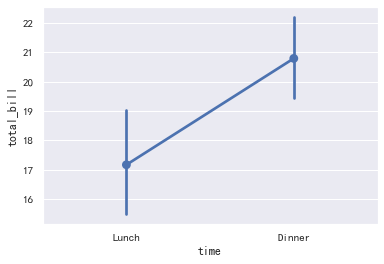

In [31]:
sns.pointplot(data=tips_df,x='time',y='total_bill')

<AxesSubplot:xlabel='time', ylabel='total_bill'>

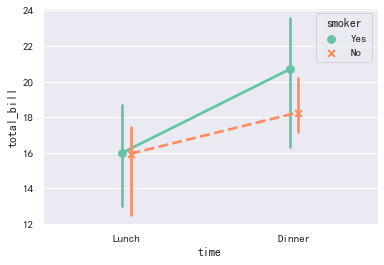

In [32]:
sns.pointplot(data=tips_df,x='time',y='total_bill',hue='smoker',estimator=np.median,  # 用中位数进行比较
             dodge=True,palette='Set2',markers=['o','x'],linestyles=['-','--'])

### catplot
该函数提供了对几个轴级函数的访问，这些函数使用几种可视化表示形式之一显示一个数字变量和一个或多个分类变量之间的关系。  
其实就是利用kind参数来画前面Categorical plots（分类图）中的任意8个图形。具体如下：

* kind：默认strip（分布散点图），也可以选择“point”, “bar”, “count”
* col、row：将决定网格的面数的分类变量，可具体制定
* col_wrap：指定每行展示的子图个数，但是与row不兼容
* row_order, col_order : 字符串列表，安排行和列，以及推断数据中的对象
* height，aspect：与图像的大小有关
* sharex，sharey：bool, ‘col’or ‘row’，是否共享想，x，y坐标

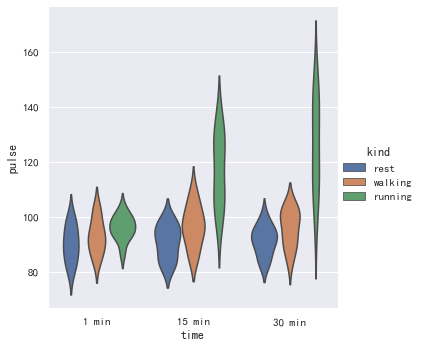

In [33]:
sns.catplot(data=exercise,x='time',y='pulse',hue='kind',kind='violin',inner=None)

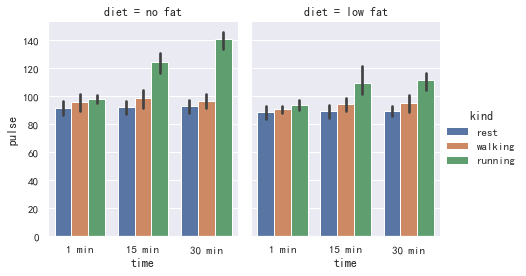

In [34]:
# 使用diet来分成几个图形，并用height、aspect来设置图片比例
sns.catplot(data=exercise,x='time',y='pulse',hue='kind',kind='bar',
           col='diet',height=4,aspect=0.8)

# Distribution plots（分布图）

## distplot（直方图）
参数：

* bins：int或list，控制直方图的划分，设置矩形图（就是块儿的多少）数量，除特殊要求一般默认
* hist：是否显示方块
* kde：是否显示核密度估计曲线
* rug：控制是否生成观测数值的小细条（边际毛毯）
* fit：控制拟合的参数分布图形，能够直观地评估它与观察数据的对应关系(黑色线条为确定的分布)
* -{hist, kde, rug, fit}_kws ：参数接收字典类型，可以自行定义更多高级的样式
* norm_hist：若为True, 则直方图高度显示密度而非计数(含有kde图像中默认为True)
* vertical：放置的方向，如果为真，则观测值位于y-轴上（默认False，x轴上）
* axlabel : string, False, or None, 设置标签

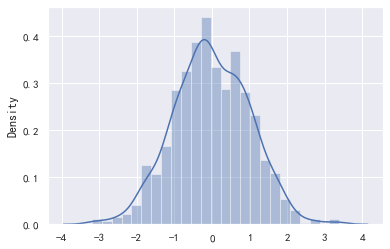

In [35]:
# 设置随机种子（666），随机生成1000个符合正态分布的数
np.random.seed(666)
x = np.random.randn(1000)
ax = sns.distplot(x)

<AxesSubplot:xlabel='norm', ylabel='Density'>

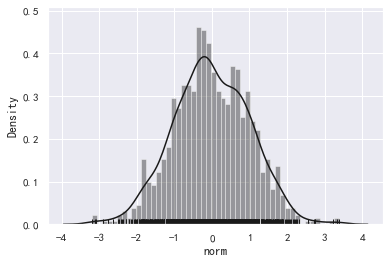

In [36]:
# 设置方块的数量，方块、密度曲线和边际毛毯都显示，颜色为‘k’，axlabel=‘norm’
sns.distplot(x,bins=50,rug=True,hist=True, kde=True,color='k',axlabel='norm')

## kdeplot（核密度图）
核密度估计(kernel density estimation)是在概率论中用来估计未知的密度函数，属于非参数检验方法之一。通过核密度估计图可以比较直观的看出数据样本本身的分布特征。具体用法如下：

* data、data2：表示可以输入双变量，绘制双变量核密度图
* shade：是否填充阴影，默认不填充
* vertical：放置的方向，如果为真，则观测值位于y轴上（默认False，x轴上）
* kernel：{‘gau’ | ‘cos’ | ‘biw’ | ‘epa’ | ‘tri’ | ‘triw’ }。默认高斯核（‘gau’）二元KDE只能使用高斯核。
* bw：{‘scott’ | ‘silverman’ | scalar | pair of scalars }。四类核密度带方法，默认scott (斯考特带宽法）
* gridsize：这个参数指的是每个格网里面，应该包含多少个点，越大，表示格网里面的点越多（觉得电脑OK的可以试试，有惊喜），越小表示格网里面的点越少
* cut：参数表示，绘制的时候，切除带宽往数轴极限数值的多少，这个参数可以配合bw参数使用
* cumulative：是否绘制累积分布
* shade_lowest：是否有最低值渲染，这个参数只有在二维密度图上才有效
* clip：表示查看部分结果，是一个区间
* cbar：参数若为True，则会添加一个颜色棒(颜色帮在二元kde图像中才有)

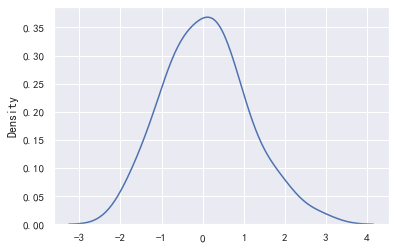

In [37]:
mean, cov = [0, 2], [(1, .5), (.5, 1)]
#这是一个多元正态分布
x, y = np.random.multivariate_normal(mean, cov, size=50).T
ax = sns.kdeplot(x)

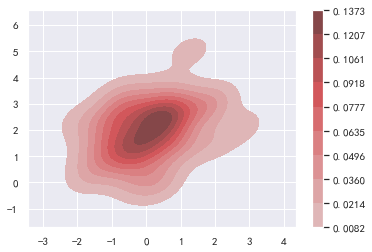

In [38]:
# 绘制双变量核密度图
ax=sns.kdeplot(x,y,shade=True,shade_lowest=False,cbar=True,color='r')

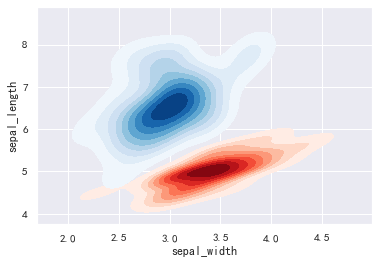

In [39]:
# 绘制双变量核密度图：二色二元密度图
setosa = iris.loc[iris.species == "setosa"]
virginica = iris.loc[iris.species == "virginica"]
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,cmap="Reds",
 shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,cmap="Blues", 
shade=True, shade_lowest=False)

## jointplot（联合分布图）
联合概率分布简称联合分布，是两个及以上随机变量组成的随机向量的概率分布。根据随机变量的不同，联合概率分布的表示形式也不同。对于离散型随机变量，联合概率分布可以以列表的形式表示，也可以以函数的形式表示；对于连续型随机变量，联合概率分布通过一非负函数的积分表示。具体参数如下：

* x,y：为DataFrame中的列名或者是两组数据，data指向dataframe
* kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }。默认散点图
* stat_func：用于计算统计量关系的函数
* ratio：中心图与侧边图的比例，越大、中心图占比越大
* dropna：去除缺失值
* height：图的尺度大小（正方形）
* space：中心图与侧边图的间隔大小
* xlim，ylim：x，y的范围

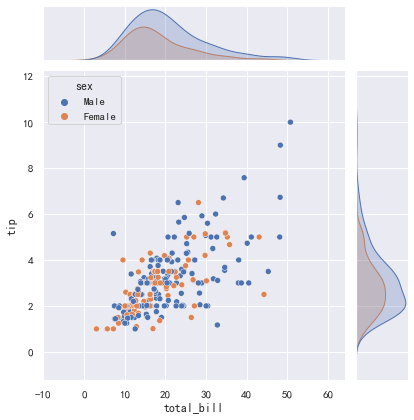

In [40]:
# 为 total_bill 和 tip 两组数据绘制联合分布图
sns.jointplot(data=tips_df, x='total_bill', y='tip', hue='sex')

上面清晰的展示了，total_bill 和 tip 之间存在正相关关系，这一点我们也可以通过 DataFrame 对象的 corr 方法进行验证。

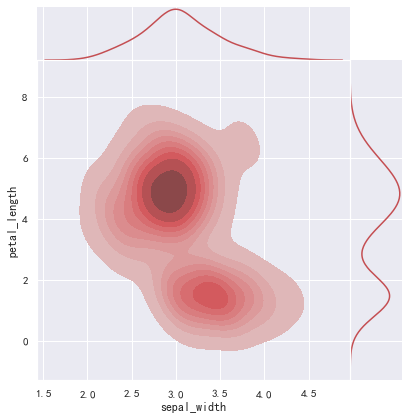

In [41]:
# 用密度估计替换散点图和直方图，调节间隔和比例
sns.jointplot(data=iris, x='sepal_width', y='petal_length',kind='kde',color='r',space=0,ratio=6,shade=True)

## pairplot（变量关系组图）

如果想了解变量之间的两两关系，我们可以绘制pairplot点对图。  
pairplot对角线上是各属性自己的直方分布图，散点图是两两关系图。

**pairplot(data,hue)**  
参数：
* data：用来比较的数据
* var：data中的子集，否则使用data中的每一列
* hue：分类标签
* hue_order：标签的顺序，列表形式，数字标签无法排序
* x_vars, y_vars：x轴和y轴要展示的标签。若两轴标签数不一致，则属性本身的直方图将不会被展示。
* palette：设置标签颜色，字典或者内置颜色
* kind：除对角线，其他图的形式。默认 scatter ，还有 kde，hist，reg 一共四种
* diag_kind：对角线图的形式。默认auto，还有 hist ，kde， None
* makers：数据点的标记
* height：每张图的高度
* aspect：相对宽度，例如0.5，就是高*0.5
* corner：true或false。因为左下和右上是重复的，true只显示左下侧
* dropna：去掉缺失值

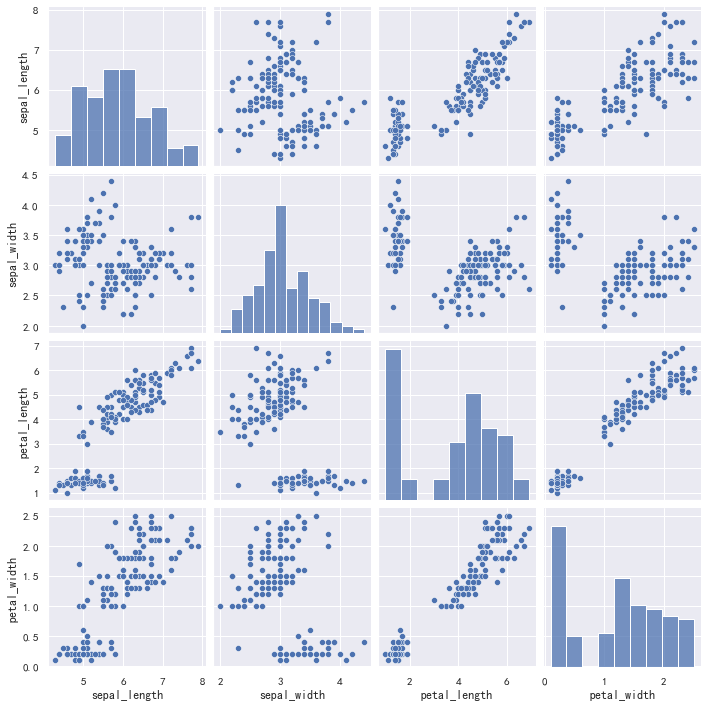

In [42]:
sns.pairplot(iris)

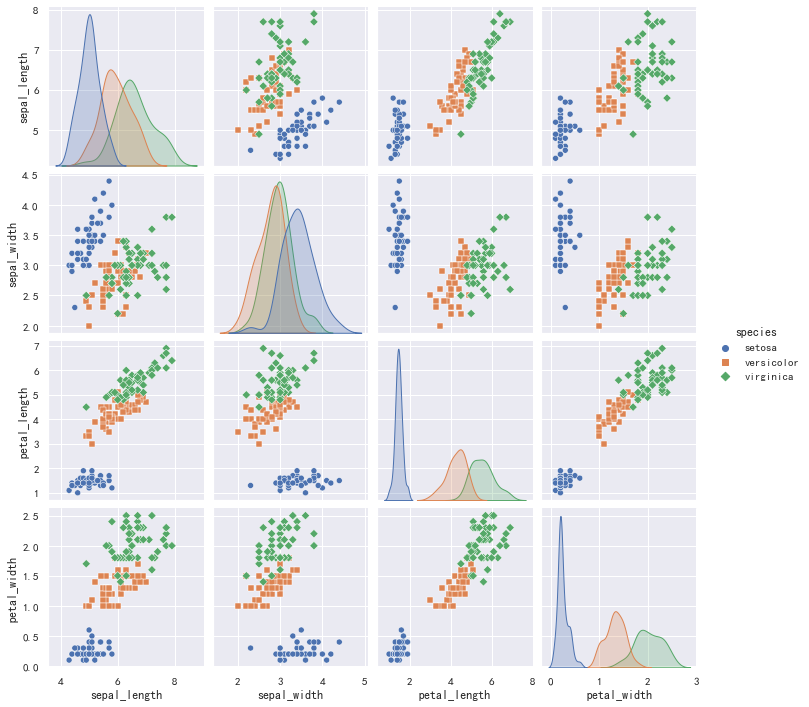

In [43]:
# 对不同种类区分颜色绘制，并使用不同标记
sns.pairplot(data=iris,hue='species',markers=['o','s','D'])

# Regression plots（回归图）

## lmplot（回归图）
绘制二维散点图时，自动完成回归拟合。具体参数如下：

* col，row：和前面一样，根据所指定属性在列，行上分类
* col_wrap：指定每行的列数，最多等于col参数所对应的不同类别的数量
* aspect：控制图的长宽比
* x_jitter，y_jitter：给x，y轴随机增加噪音点，设置这两个参数不影响最后的回归直线
* order：多项式回归，控制进行回归的幂次，设定指数，可以用多项式拟合
* logistic：逻辑回归
* robust：如果是True，使用statsmodels来估计一个稳健的回归（鲁棒线性模型）。这将减少异常值。请注意 logistic回归和robust回归相较于简单线性回归需要更大的计算量，其置信区间的产生也依赖于bootstrap采样，你可以关掉置信区间估计来提高速度（ci=None）
* lowess：如果是True，使用statsmodels来估计一个非参数的模型(局部加权线性回归)。这种方法具有最少的假设，尽管它是计算密集型的，但目前无法为这类模型绘制置信区间
* logx：转化为log(x)
* truncate：默认情况下，绘制散点图后绘制回归线以填充x轴限制。如果为True，则它将被数据限制所限制

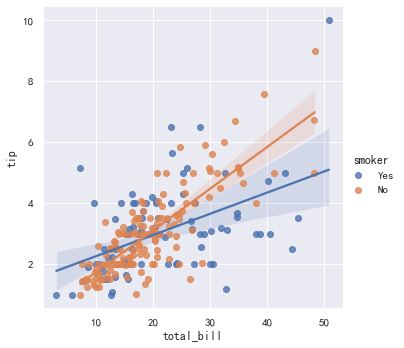

In [44]:
sns.lmplot(data=tips_df, x='total_bill', y='tip', hue='smoker')

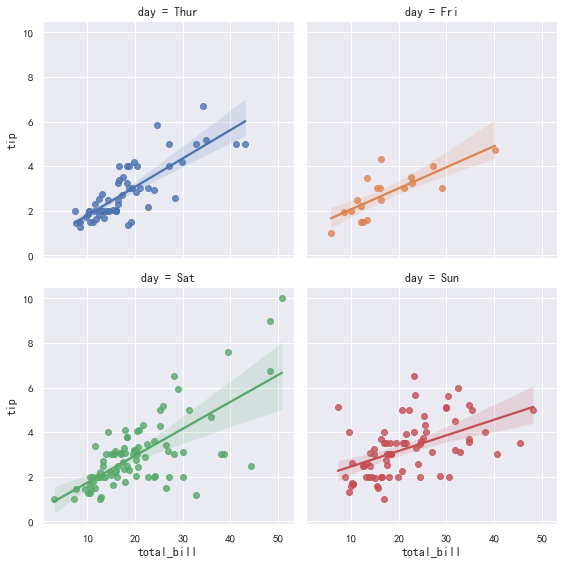

In [45]:
# 将变量分为多行，并改变大小
sns.lmplot(data=tips_df, x='total_bill', y='tip', hue='day',
          col='day',col_wrap=2,height=4)

## regplot（）
regplot()和lmplot()都可以绘制线性回归曲线。这两个函数非常相似，但regplot()没有hue参数，也没有row、col参数。

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

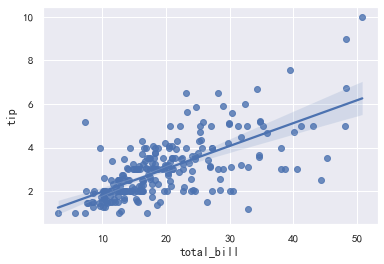

In [46]:
sns.regplot(data=tips_df, x='total_bill', y='tip')

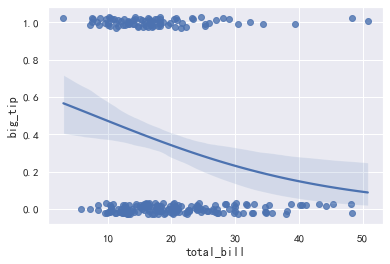

In [47]:
# 尝试逻辑回归分类
tips_df["big_tip"] = (tips_df.tip / tips_df.total_bill) > .175
ax = sns.regplot(x="total_bill", y="big_tip", data=tips_df,logistic=True, n_boot=500, y_jitter=.03)

# Matrix plots（矩阵图）

## heatmap（热力图）
利用热力图可以看数据表里多个特征两两的相似度，类似于色彩矩阵。具体参数如下：

* data：矩阵数据集，可以使numpy的数组（array），如果是pandas的dataframe，则df的index/column信息会分别对应到heatmap的columns和rows
* vmax,vmin：图例中最大值和最小值的显示值，没有该参数时默认不显示
* cmap：从数字到色彩空间的映射，取值是matplotlib包里的colormap名称或颜色对象，或者表示颜色的列表
* center：数据表取值有差异时，设置热力图的色彩中心对齐值。通过设置center值，可以调整生成的图像颜色的整体深浅；设置center数据时，如果有数据溢出，则手动设置的vmax、vmin会自动改变 
* robust：默认取值False；如果是False，且没设定vmin和vmax的值，热力图的颜色映射范围根据具有鲁棒性的分位数设定，而不是用极值设定
* annot(annotate的缩写)：默认取值False；如果是True，在热力图每个方格写入数据；如果是矩阵，在热力图每个方格写入该矩阵对应位置数据
* fmt：字符串格式代码，矩阵上标识数字的数据格式，比如保留小数点后几位数字
* annot_kws:默认取值False；如果是True，设置热力图矩阵上数字的大小颜色字体
* square:设置热力图矩阵小块形状，默认值是False
* xticklabels, yticklabels:控制每行列标签名的输出。默认值是auto，自动选择标签的标注间距，将标签名不重叠的部分(或全部)输出。如果是True，则以DataFrame的列名作为标签名
* mask:控制某个矩阵块是否显示出来。默认值是None。如果是布尔型的DataFrame，则将DataFrame里True的位置用白色覆盖掉

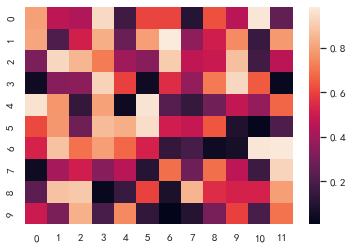

In [48]:
x = np.random.rand(10, 12)
ax = sns.heatmap(x)

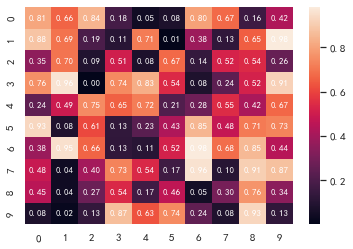

In [49]:
# 显示数字和保留几位小数，并修改数字大小字体颜色格式
x= np.random.rand(10, 10)
ax = sns.heatmap(x,annot=True,annot_kws={'size':9,'weight':'bold', 'color':'w'},fmt='.2f')

## clustermap（聚类图）
clustermap() 可以将矩阵数据集绘制为层次聚类热图。具体参数如下：

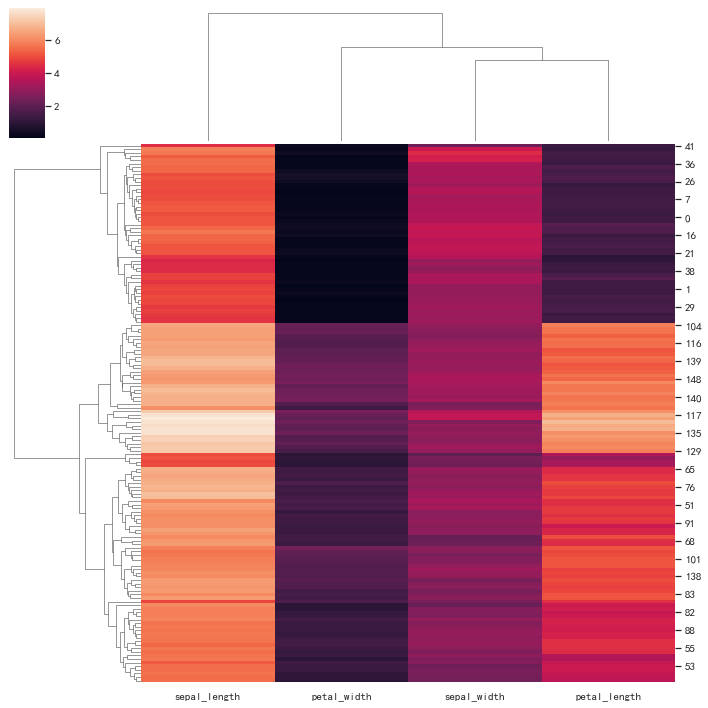

In [50]:
species = iris.pop("species")
g = sns.clustermap(iris)

# FacetGrid（）

FacetGrid() 用于初始化网格对象，每一个子图都称为一个格子。它是relplot()，catplot()以及lmplot()这几个函数的一个上层类，我们可以根据自己的需求定制每个格子中画什么样的图形，使用更加自由。

在大多数情况下，与直接使用FacetGrid相比，使用图形级函数（例如relplot或catart）要好得多。

FacetGrid并不能直接绘制我们想要的图像，它的基本工作流程是FacetGrid使用数据集和用于构造网格的变量初始化对象。然后，可以通过调用FacetGrid.map()或将一个或多个绘图函数应用于每个子集 FacetGrid.map_dataframe()，最后，可以使用其他修改参数的方法调整绘图。

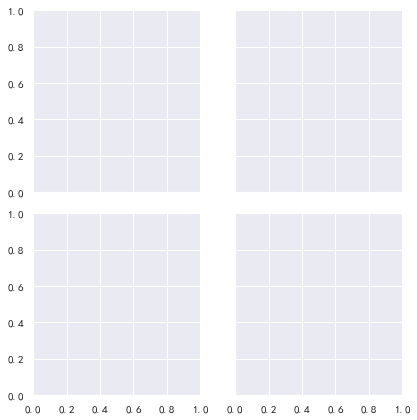

In [52]:
# 使用TIPS数据集初始化2x2个面网格:
sns.FacetGrid(tips_df, col="time", row="smoker") # 2*2
plt.show()

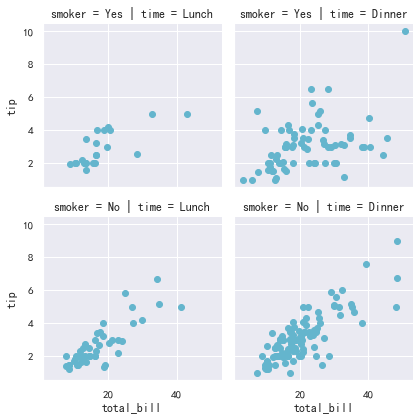

In [53]:
# 然后，在每个格子上绘制一个散点图，根据列和行进行分类，描述两个变量的联合分布：
g = sns.FacetGrid(tips_df, col="time", row="smoker")
g = g.map(plt.scatter, "total_bill", "tip", color="c") # g.map()需要传入一个绘图函数
plt.show()

# PairGrid()

PairGrid() 用于绘制数据集中成对关系的子图网格。它的原理和我们之前的pairplot是一样的，但是前面我们可以发现pairplot绘制的图像上、下三角形是关于主对角线对称的，而PairGrid则可修改上、下三角形和主对角线的图像形状。

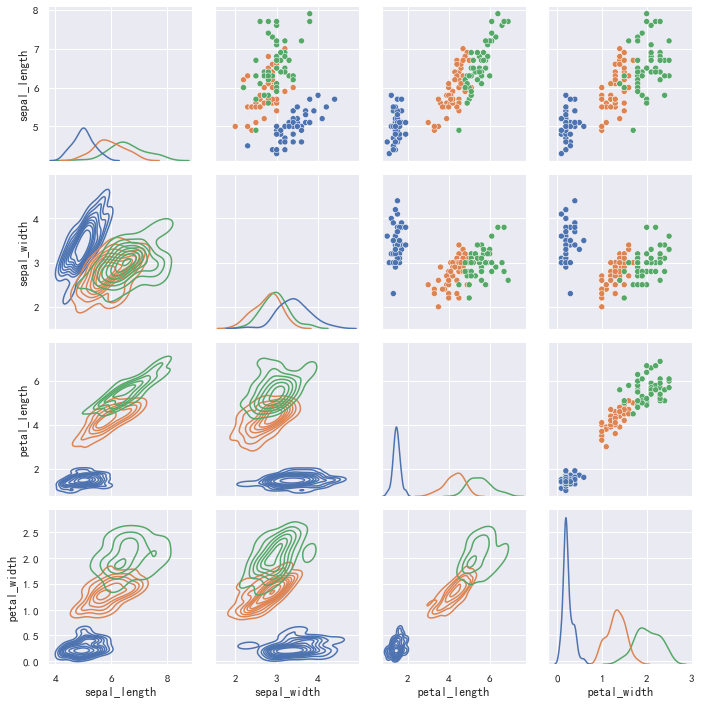

In [58]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris,hue="species")
g = g.map_upper(sns.scatterplot)        #在上对角线子图上用二元函数绘制的图
g = g.map_lower(sns.kdeplot)            #在下对角线子图上用二元函数绘制的图
g = g.map_diag(sns.kdeplot)             #对角线单变量子图
plt.show()

# 主题和颜色

## 主题(style)
seaborn设置风格的方法主要有三种：

* set，通用设置接口
* set_style，风格专用设置接口，设置后全局风格随之改变
* axes_style，设置当前图（axes级）的风格，同时返回设置后的风格系列参数，支持with关键字用法  

seaborn中主要有以下几个主题：  
* `sns.set_style("whitegrid")`：白色网格背景
* `sns.set_style("darkgrid")`：灰色网格背景
* `sns.set_style("dark")`：灰色背景
* `sns.set_style("white")`：白色背景
* `sns.set_style("ticks")`：四周加边框和刻度

### axes_style()
这个函数调用的时候如果不传递任何参数，那么将会返回可以设置的所有属性。有时候我们不知道什么属性可以设置，那么可以打印下这个函数的返回值:

In [61]:
sns.axes_style()

{'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': 'white',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['SimHei', 'Microsoft YaHei'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

这个函数也可以用来设置样式，但是只能通过with语句调用：

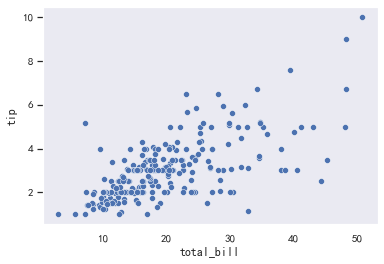

In [62]:
with sns.axes_style("dark",{'ytick.left':True}):
    sns.scatterplot(data=tips_df,x='total_bill',y='tip')

### set_style()
这个函数跟sns.axes_style一样，也是用来设置绘图风格。但是这个函数的风格设置，不是临时的，而是一旦设置了，那么下面的所有绘图都是用这个风格。

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

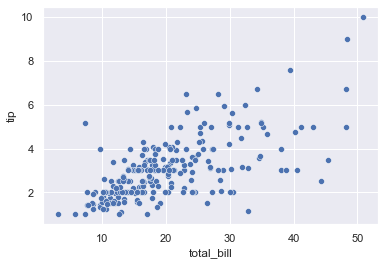

In [63]:
sns.set_style("darkgrid")
sns.scatterplot(x="total_bill",y="tip",data=tips_df)

### set()
set方法也是用来设置样式的，他的功能更加强大。除了style以外，还可以设置调色板，字体，字体大小，颜色等，也可以设置其他的matplotlib.rcParams可以接收的参数。

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

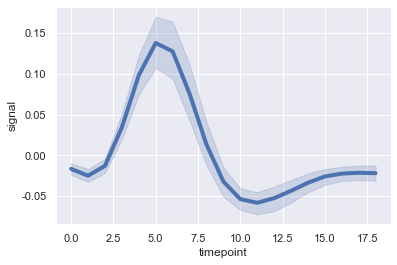

In [64]:
sns.set(rc={"lines.linewidth":4})
sns.lineplot(x="timepoint",y="signal",data=fmri)

## 环境（context）
设置环境的方法有3种：

* set，通用设置接口
* set_context，环境设置专用接口，设置后全局绘图环境随之改变
* plotting_context，设置当前图（axes级）的绘图环境，同时返回设置后的环境系列参数，支持with关键字用法  

4种默认绘图环境最直观的区别在于字体大小的不同，其他方面略有差异。
* `sns.plotting_context("notebook")`：默认
* `sns.plotting_context("paper")`
* `sns.plotting_context("talk")`
* `sns.plotting_context("poster")`

## 颜色（color_palette）
seaborn根据应用场景提供了三种不同类型的调色盘:定性的、连续的、发散的。

### 定性调色盘

定性调色盘。一般在数据不连续，比较离散，想体现分类的情况下使用。在seaborn中，使用sns .color_palette来创建调色盘

#### 默认调色盘

在seaborn中，默认情况下就设置了一些颜色供绘图使用。使用sns .color_palette即可获取。并且我们可以通过sns.palplot来绘制调色盘。

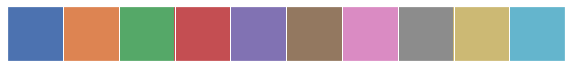

In [65]:
sns.palplot(sns.color_palette())

默认的调色盘有10种颜色。这些颜色都有6种风格。分别是: deep, muted , pastel， bright, dark ,colorblind。这几种风格的颜色不变，主要调整的是亮度和饱和度。

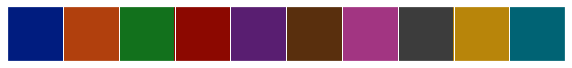

In [66]:
current_palette = sns.color_palette("dark")
sns.palplot(current_palette)

#### hls圆形颜色系统
hls圆形颜色系统是颜色按照顺序，经过偏移，无缝形成一个圆形。我们在使用这个调色盘的时候，可以指定需要使用多少种颜色.

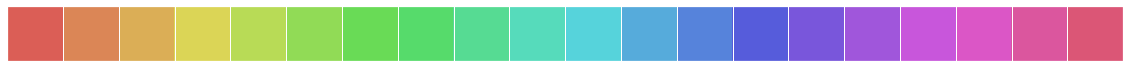

In [67]:
# 使用hls圆形颜色系统，取20个颜色
sns.palplot(sns.color_palette("hls",20))

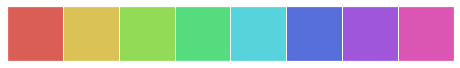

In [68]:
sns.palplot(sns.hls_palette(n_colors=8,h=0.01,l=0.6))

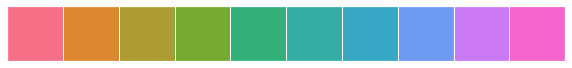

In [69]:
sns.palplot(sns.husl_palette(10))

#### 分类颜色
分类颜色是seaborn已经提前给你定义了一些颜色，使用这些颜色在做分类分组的时候可以按照自己的需求选择。

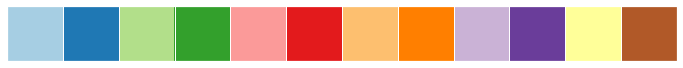

In [70]:
sns.palplot(sns.color_palette("Paired"))

In [71]:
sns.choose_colorbrewer_palette("qualitative")

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),
 (0.21568627450980393, 0.4941176470588236, 0.7215686274509804),
 (0.3019607843137256, 0.6862745098039216, 0.29019607843137263),
 (0.5960784313725492, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (0.9999999999999998, 1.0, 0.19999999999999996),
 (0.6509803921568629, 0.33725490196078434, 0.1568627450980391),
 (0.9686274509803922, 0.5058823529411766, 0.7490196078431374),
 (0.6, 0.6, 0.6)]

#### xkcd颜色
xkcd是一个漫画工作室。xkcd开展了一项众包活动，为随机的RGB颜色命名。这产生了一组954种命名颜色。我们可以从sns.xkcd_palette里面提取颜色。提取到后，如果想要用在palette参数中，那么还需要放到sns.xkcd_palette中。所有的xkcd颜色的名称可以参考官网: https://xkcd.com/color/rgb/

#137e6d


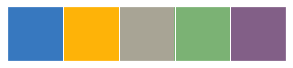

In [72]:
# 获取名字为blue green的颜色
print(sns.xkcd_rgb["blue green"])
# 用xkcd的颜色名称构建一个palette对象
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))

### 连续调色盘
有时候我们绘图的时候，想要使用一个同种色系，但是不同深浅，这时候就可以使用连续的颜色盘。

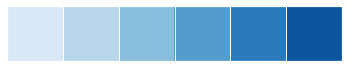

In [73]:
sns.palplot(sns.color_palette("Blues"))

默认颜色是从浅入深，如果想要从深变浅，那么可以在色系后加一个_r。

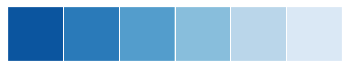

In [74]:
sns.palplot(sns.color_palette("Blues_r"))

In [75]:
sns.choose_colorbrewer_palette("sequential")

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

[(0.9575547866205305, 0.9575547866205305, 0.9575547866205305),
 (0.9012072279892349, 0.9012072279892349, 0.9012072279892349),
 (0.8328950403690888, 0.8328950403690888, 0.8328950403690888),
 (0.7502191464821223, 0.7502191464821223, 0.7502191464821223),
 (0.6434140715109573, 0.6434140715109573, 0.6434140715109573),
 (0.5387158785082661, 0.5387158785082661, 0.5387158785082661),
 (0.440322952710496, 0.440322952710496, 0.440322952710496),
 (0.342883506343714, 0.342883506343714, 0.342883506343714),
 (0.22329873125720878, 0.22329873125720878, 0.22329873125720878),
 (0.10469819300269129, 0.10469819300269129, 0.10469819300269129)]

### 离散调色盘
离散的色盘，是两边的颜色逐渐加深，中间的颜色最淡。或者是中间的颜色最深，两边的颜色最淡。一般离散的色盘可以用于比如温度，零度以上可以用红色表示，零度以下用蓝色表示。越红的地方，表示温度越高，越蓝的地方，表示温度越低。

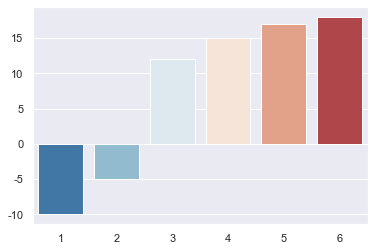

In [76]:
values = [12,15,17,18,-5,-10]
with sns.color_palette("RdBu_r"):    
    sns.barplot([1,2,3,4,5,6],sorted(values))

In [77]:
sns.choose_colorbrewer_palette("diverging")

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

[(0.6922722029988467, 0.09227220299884642, 0.16770472895040373),
 (0.8392156862745099, 0.376470588235294, 0.3019607843137253),
 (0.9545559400230679, 0.641753171856978, 0.5057285659361783),
 (0.9921568627450982, 0.8588235294117645, 0.7803921568627449),
 (0.9657054978854286, 0.9672433679354094, 0.9680891964628989),
 (0.8196078431372551, 0.8980392156862745, 0.9411764705882353),
 (0.5664744329104192, 0.7687043444828916, 0.8685121107266438),
 (0.26274509803921564, 0.576470588235294, 0.7647058823529411),
 (0.1272587466359093, 0.39584775086505203, 0.6687427912341407)]